# Iterative Construction of a Penalised Vine Structure
This notebook iteratively estimate the quantile.

#### Libraries

In [1]:
import openturns as ot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

random_state = 123
np.random.seed(random_state)

#### Model function
This example consider the simple additive example.

In [2]:
def sum_func(x, a=None):
    """Additive example
    """        
    n, dim = x.shape
    if a is None:
        a = np.ones((dim, 1))

    if a.ndim == 1:
        a = a.reshape(-1, 1)
        assert a.shape[0] == dim, "Shape not good"
    elif a.ndim > 2:
        raise AttributeError('Dimension problem for constant a')
        
    return np.dot(x, a)

#### Dimension and margins
We first define the problem dimension and the margins

In [3]:
dim = 5
margins = [ot.Normal()]*dim

We chose the coefficients of the variables throught the additive function.

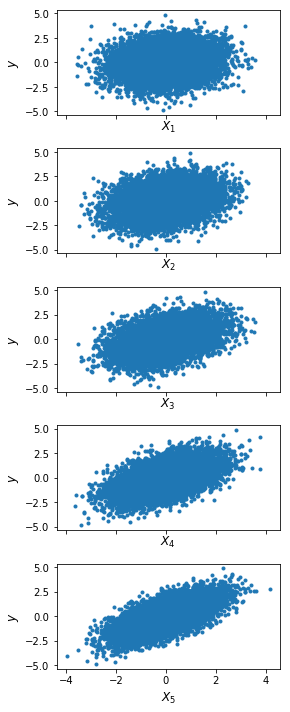

In [4]:
coeficients = np.linspace(0., 1., dim+1, endpoint=False)[1:]

n_plot = 10000
x = np.asarray(ot.ComposedDistribution(margins).getSample(n_plot))
y = sum_func(x, coeficients)

fig, axes = plt.subplots(dim, 1, sharex=True, sharey=True, figsize=(4, 2*dim))
for i in range(dim):
    ax = axes[i]
    ax.plot(x[:, i], y, '.')
    ax.set_xlabel(r'$X_%d$' % (i+1), fontsize=12)
    ax.set_ylabel(r'$y$', fontsize=12)
fig.tight_layout()

#### Copula families
We now consider only Gaussian dependencies for this example

In [5]:
families = np.zeros((dim, dim), dtype=int)
for i in range(1, dim):
    for j in range(i):
        families[i, j] = 1

## Estimations
We create an instance of the main class for conservative estimate, and we define a q_func object for the quantile as a quantity of interest

In [6]:
from dependence import ConservativeEstimate, quantile_func

quant_estimate = ConservativeEstimate(model_func=sum_func, margins=margins, families=families)

alpha = 0.01
q_func = quantile_func(alpha)
q_func = np.var

First, we compute the quantile at independence

In [11]:
n = 1000

indep_result = quant_estimate.independence(n_input_sample=n, q_func=q_func, random_state=random_state)

In [12]:
print('Quantile at independence: %.4f' % (indep_result.quantity))

Quantile at independence: 5.0841


In [15]:
indep_result.compute_bootstrap()
indep_result.bootstrap_sample

0.050489777003644543

### Grid Search Approach
Firstly, we use consider a grid search approach in order to compare at the end the perfomances of the iterative algorithm.

In [ ]:
K = 100
result = estimation.gridsearch_minimize(n_dep_param=K, n_input_sample=n, q_func=q_func, random_state=random_state)

In [ ]:
print('')